In [34]:
import ipywidgets as widgets
IPython.display.display(HTML('''<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-success" title="Run stage" onclick="runStage(Jupyter.notebook.get_cell_elements().index(this.closest('.cell')));"><i class="fa fa-play"></i>Run stage</button>'''))

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# s_s = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [79]:
'''удаляем лишние столбцы'''
# train.drop( 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
#           'Exterior2nd',  )

'''создаем новый параметр умножением состояния на качество материалов'''
# train.OverallQual = train.OverallCond * train.OverallQual
# train.drop('OverallCond')
'''переводим состояние и качество фасада в int и создаем на основе новый параметр'''
# train.ExterCond = train.ExterCond.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
# train.ExterQual = train.ExterQual.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
# train.ExterQual = train.ExterCond * train.ExterQual
# train.drop('ExterCond')


# train.YearBuilt = 2010 - train.YearBuilt
# train.YearRemodAdd = [train.YearBuilt - train.YearRemodAdd < 0]

In [63]:
train.c1 = 2010 - train.YearBuilt
train.c2 = 2010 - train.YearRemodAdd
train.c3 = train.c1 - train.c2
train.c3[train.c3 > 0] = 1
train.c3

train.c4 = [train.YearBuilt - train.YearRemodAdd < 0]

In [81]:
train['BsmtQual'].value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [15]:
# df = train[['ExterQual', 'BsmtQual', 'MSSubClass', 'SalePrice']]
# df = df.replace(to_replace=['Gd', 'TA', 'Ex', 'Fa' ], value=[2, 1, 3, 0])
# df.BsmtQual = df.BsmtQual.fillna(0)


In [8]:
train.MSZoning.value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

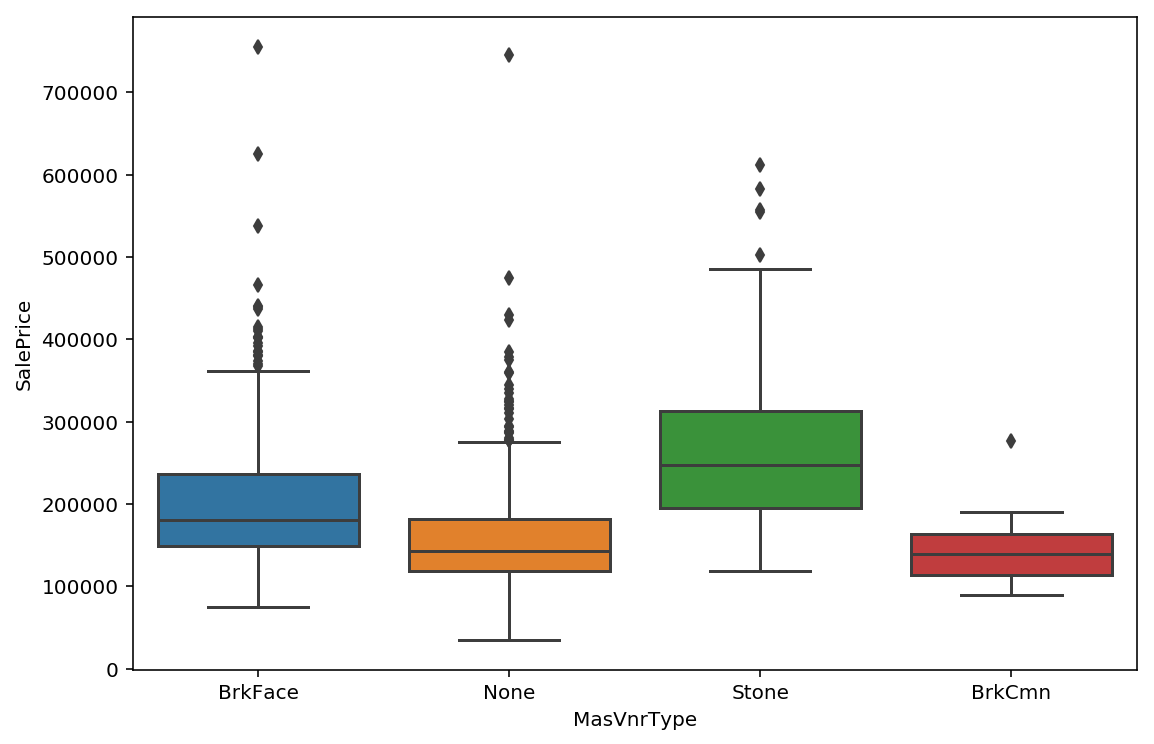

In [69]:
sns.boxplot(x="MasVnrType", y="SalePrice", 
            data=train)

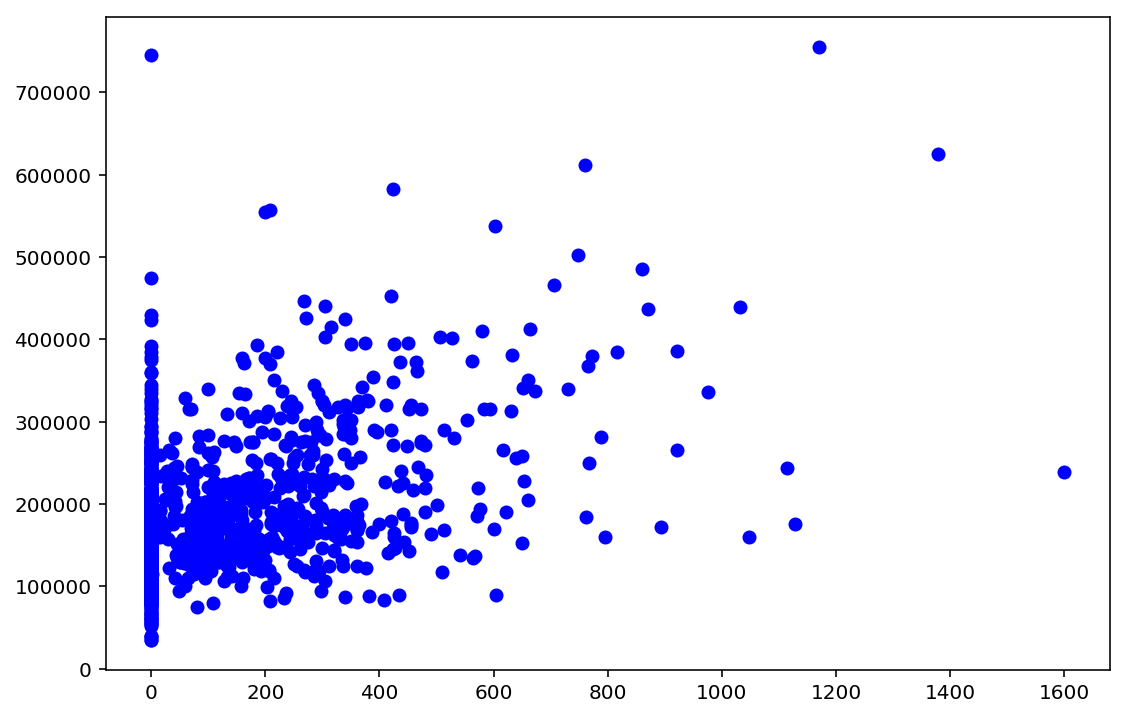

In [70]:
plt.plot(train.MasVnrArea, train.SalePrice, 'bo')